# Logistic Regression

## Introduction

When an email lands in your inbox, how does your email service know whether it’s real or spam? This evaluation is made billions of times per day, and one possible method is logistic regression.

__Logistic regression__ is a supervised machine learning algorithm that predicts the probability, ranging from 0 to 1, of a datapoint belonging to a specific category, or class. These probabilities can then be used to assign, or classify, observations to the more probable group.

For example, we could use a logistic regression model to predict the probability that an incoming email is spam. If that probability is greater than 0.5, we could automatically send it to a spam folder. This is called binary classification because there are only two groups (eg., spam or not spam).

Some other examples of problems that we could solve using logistic regression:

- Disease identification — Is a tumor malignant?
- Customer conversion — Will a customer arriving on a sign-up page enroll in a service?

In this lesson you will learn how to perform logistic regression and use it to make predictions!

If you are unfamiliar with linear regression, we recommend you review it before proceeding. Otherwise, let’s dive in!

## Linear Regression Approach

With the data from Codecademy University, we want to predict whether each student will pass their final exam. Recall that in linear regression, we fit a line of the following form to the data:

$ y = b0 + b1*x1 + b2*x2 + ... + bn*xn$

where

- `y` is the value we are trying to predict
- `b_0` is the intercept of the regression line
- `b_1`, `b_2`, … `b_n` are the coefficients
- `x_1`, `x_2`, … `x_n` are the predictors (also sometimes called features)

For our data, `y`    is a binary variable, equal to either `1` (passing), or `0` (failing). We have only one predictor (`x_1`): `num_hours_studied`. Below we’ve fitted a linear regression model to our data and plotted the results. The best fit line is in red.

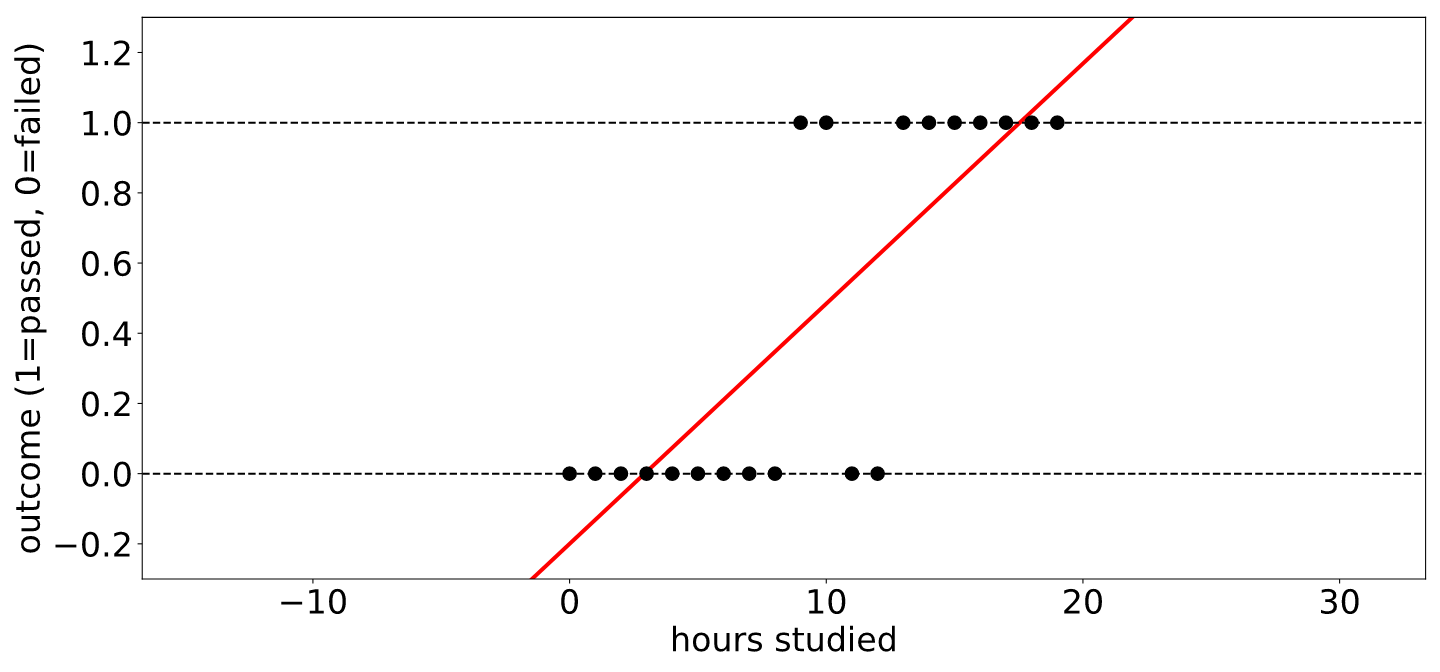

We see that the linear model does not fit the data well. Our goal is to predict whether a student passes or fails; however, a best fit line allows predictions between negative and positive infinity.

## Logistic Regression

We saw that predicted outcomes from a linear regression model range from negative to positive infinity. These predictions don’t really make sense for a classification problem. Step in __logistic regression__!

To build a logistic regression model, we apply a __logit link function__ to the left-hand side of our linear regression function. Remember the equation for a linear model looks like this:

$ y = b0 + b1*x1 + b2*x2 + ... + bn*xn$

When we apply the logit function, we get the following:

$ ln(y/1-y) = b0 + b1*x1 + b2*x2 + ... + bn*xn$

For the Codecademy University example, this means that we are fitting the curve shown below to our data — instead of a line, like in linear regression:

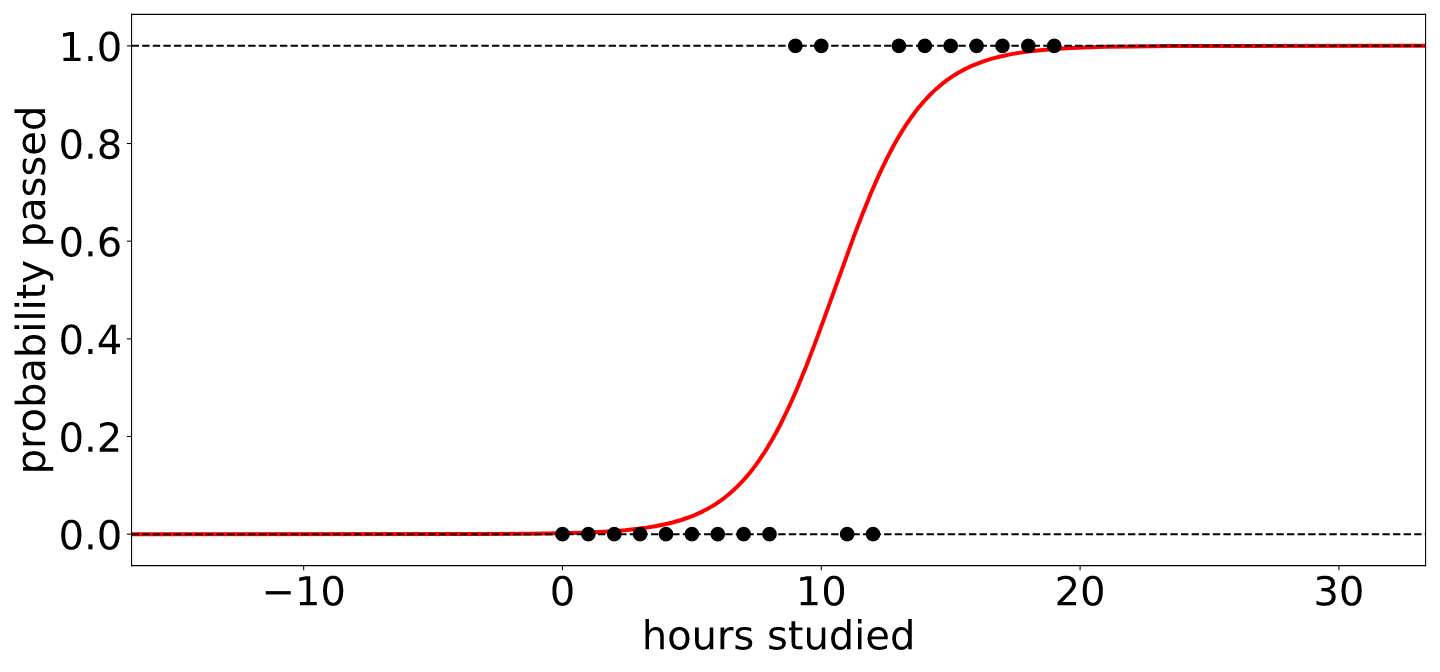

Notice that the red line stays between 0 and 1 on the y-axis. It now makes sense to interpret this value as a probability of group membership; whereas that would have been non-sensical for regular linear regression.

Note that this is a pretty nifty trick for adapting a linear regression model to solve classification problems! There are actually many other kinds of link functions that we can use for different adaptations.

## Log-Odds

So far, we’ve learned that the equation for a logistic regression model looks like this:

$ ln(p /1 - p) = b0 + b1*x1 + b2*x2 + ... + bn*xn$

Note that we’ve replaced y with the letter p because we are going to interpret it as a probability (eg., the probability of a student passing the exam). The whole left-hand side of this equation is called __log-odds__ because it is the natural logarithm $(ln)$ of odds $(p/(1-p))$. The right-hand side of this equation looks exactly like regular linear regression!

In order to understand how this link function works, let’s dig into the interpretation of __log-odds__ a little more. The odds of an event occurring is:

$ Odds = p / 1 - p = P(event occurring) / P(event not occurring)$

For example, suppose that the probability a student passes an exam is 0.7. That means the probability of failing is $1 - 0.7 = 0.3$. Thus, the odds of passing are:

$ Odds of passing = 0.7 / 0.3 = 2.33 $

This means that students are 2.33 times more likely to pass than to fail.

Odds can only be a positive number. When we take the natural log of odds (the log odds), we transform the odds from a positive value to a number between negative and positive infinity — which is exactly what we need! The logit function (log odds) transforms a probability (which is a number between 0 and 1) into a continuous value that can be positive or negative.


In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# Calculate odds_of_rain
# Note that the odds are less than 1 because the probability of rain is less than 0.5.
odds_of_rain = 0.4 / (1-0.4)
print(odds_of_rain)

# Calculate log_odds_of_rain
# Note that the log odds are negative because the probability of rain was less than 0.5.
log_odds_of_rain = np.log(odds_of_rain)
print(log_odds_of_rain)


# Calculate odds_on_time
# Note that the odds are greater than 1 because the probability is greater than 0.5.
odds_on_time = 0.9 / (1-0.9)
print(odds_on_time)

# Calculate log_odds_on_time
# Note that the log odds are positive because the probability of an on-time train was greater than 0.5.
log_odds_on_time = np.log(odds_on_time)
print(log_odds_on_time)


0.6666666666666667
-0.4054651081081643
9.000000000000002
2.1972245773362196


## Sigmoid Function

Let’s return to the logistic regression equation and demonstrate how this works by fitting a model in sklearn. The equation is:


$ ln(p /1 - p) = b0 + b1*x1 + b2*x2 + ... + bn*xn $

Suppose that we want to fit a model that predicts whether a student passed on a final exame based on the hours he studied. We’ll use the amount of hours they spent on studing as a predictor. 

In [8]:
codecademyU = pd.read_csv('codecademyU.csv')

# Fit the logistic regression model
hours_studied = codecademyU[['hours_studied']]
passed_exam = codecademyU[['passed_exam']]

model = LogisticRegression()
# We’ll use the hours_studied as a predictor
model.fit(hours_studied, passed_exam)


/opt/anaconda3/envs/ml-codecademy/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Next, just like linear regression, we can use the right-hand side of our regression equation to make predictions for each of our original datapoints as follows:

In [9]:
# Save intercept and coef
intercept = model.intercept_
coef = model.coef_

# Calculate log_odds here
log_odds = intercept + coef * hours_studied
print(log_odds)

    hours_studied
0       -6.236653
1       -5.643001
2       -5.049350
3       -4.455698
4       -3.862046
5       -3.268395
6       -2.674743
7       -2.081092
8       -1.487440
9       -0.893788
10      -0.300137
11       0.293515
12       0.887166
13       1.480818
14       2.074470
15       2.668121
16       3.261773
17       3.855425
18       4.449076
19       5.042728


- `model.coef_` is a vector of the coefficients of each feature
- `model.intercept_` is the intercept

The coefficients can be interpreted as follows:

- Large positive coefficient: a one unit increase in that feature is associated with a large increase in the log odds (and therefore probability) of a datapoint belonging to the positive class (the outcome group labeled as 1)
- Large negative coefficient: a one unit increase in that feature is associated with a large decrease in the log odds/probability of belonging to the positive class.
- Coefficient of 0: The feature is not associated with the outcome.

 Notice that these predictions range from negative to positive infinity: these are log odds. In other words, for the first datapoint, we have:

 $ ln(p /1 - p) = −3.28394203 $


 We can turn log odds into a probability as follows:

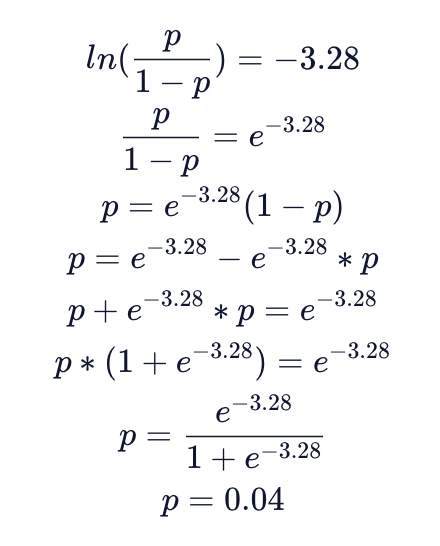

In Python, we can do this simultaneously for all of the datapoints using NumPy (loaded as `np`):

In [10]:
# Calculate pred_probability_passing here
pred_probability_passing = np.exp(log_odds)/(1+ np.exp(log_odds))
print(pred_probability_passing)

    hours_studied
0        0.001953
1        0.003530
2        0.006373
3        0.011479
4        0.020592
5        0.036671
6        0.064480
7        0.110948
8        0.184306
9        0.290329
10       0.425524
11       0.572856
12       0.708305
13       0.814696
14       0.888397
15       0.935119
16       0.963094
17       0.979274
18       0.988446
19       0.993585


The calculation that we just did required us to use something called the sigmoid function, which is the inverse of the logit function. The sigmoid function produces the S-shaped curve we saw previously:

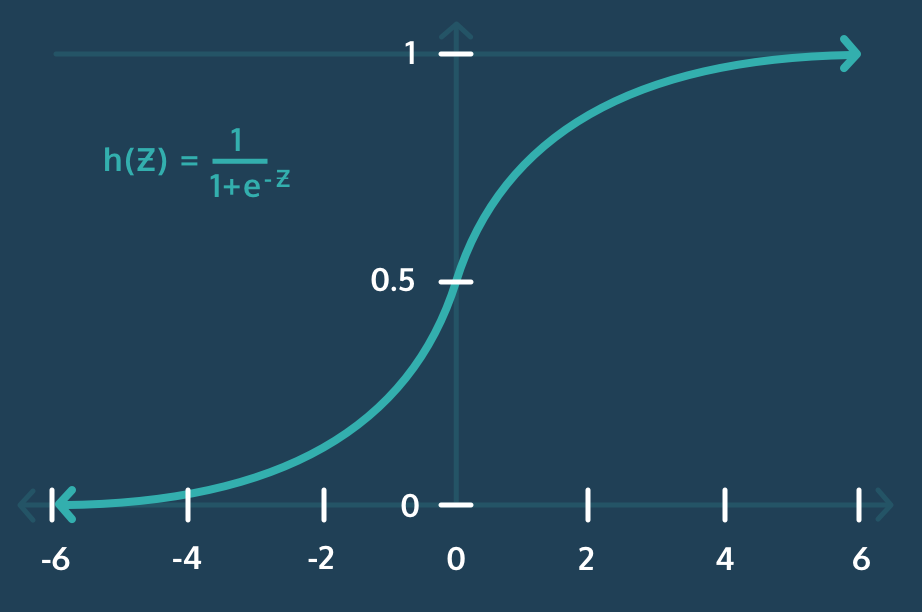

## Sklearn

One important note is that sklearn‘s logistic regression implementation requires the features to be standardized because regularization is implemented by default.

In [16]:
codecademyU_2 = pd.read_csv('codecademyU_2.csv')

# Separate out X and y
X = codecademyU_2[['hours_studied', 'practice_test']]
y = codecademyU_2.passed_exam

# Transform X
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

We’ll begin by importing the LogisticRegression module and creating a LogisticRegression object:

In [18]:
cc_lr = LogisticRegression()
cc_lr.fit(X_train, y_train)

# Print the intercept and coefficients here:
print(cc_lr.intercept_)
print(cc_lr.coef_)

[-0.13173123]
[[1.5100409  0.12002228]]


Both coefficients are positive, which makes sense: we expect students who study more and earn higher grades on the practice test to be more likely to pass the final exam. The coefficient on `hours_studied` is larger than the coefficient on `practice_test`, suggesting that `hours_studied` is more strongly associated with students’ probability of passing.

Using a trained model, we can predict whether new datapoints belong to the positive class (the group labeled as `1`) using the `.predict()` method. The input is a matrix of features and the output is a vector of predicted labels, `1` or `0`.

In [22]:
# Print out the predicted outcomes for the test data
y_pred = cc_lr.predict(X_test)
print(y_pred)

[0 1 0 1 1]


If we are more interested in the predicted probability of group membership, we can use the `.predict_proba()` method. The input to `predict_proba()` is also a matrix of features and the output is an array of probabilities, ranging from $0$ to $1$:

In [20]:
# Print out the predicted probabilities for the test data
print(cc_lr.predict_proba(X_test)[:,1])

[0.32065927 0.7931881  0.05547483 0.57747928 0.87070434]


By default, `.predict_proba()` returns the probability of class membership for both possible groups. In the example code above, we’ve only printed out the probability of belonging to the positive class. Notice that datapoints with predicted probabilities greater than 0.5 (the second and third datapoints in this example) were classified as 1s by the `.predict()` method. This is a process known as thresholding. As we can see here, sklearn sets the default classification threshold probability as 0.5.

In [21]:
# Print out the true outcomes for the test data
print(y_test)

7     0
15    1
0     0
11    0
17    1
Name: passed_exam, dtype: int64


## Classification Thresholding

As we’ve seen, logistic regression is used to predict the probability of group membership. Once we have this probability, we need to make a decision about what class a datapoint belongs to. This is where the __classification threshold__ comes in!

The default threshold for `sklearn` is 0.5. If the predicted probability of an observation belonging to the positive class is greater than or equal to the threshold, 0.5, the datapoint is assigned to the positive class.

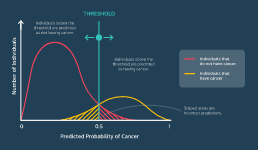

We can choose to change the threshold of classification based on the use-case of our model. For example, if we are creating a logistic regression model that classifies whether or not an individual has cancer, we may want to be more sensitive to the positive cases. We wouldn’t want to tell someone they don’t have cancer when they actually do!

In order to ensure that most patients with cancer are identified, we can move the classification threshold down to 0.3 or 0.4, increasing the sensitivity of our model to predicting a positive cancer classification. While this might result in more overall misclassifications, we are now missing fewer of the cases we are trying to detect: actual cancer patients.

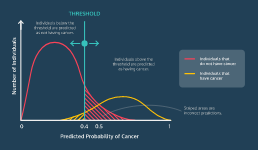


## Confusion matrix

When we fit a machine learning model, we need some way to evaluate it. Often, we do this by splitting our data into training and test datasets. We use the training data to fit the model; then we use the test set to see how well the model performs with new data.

As a first step, data scientists often look at a confusion matrix, which shows the number of true positives, false positives, true negatives, and false negatives.

We can create a confusion matrix as follows:

In [23]:
# Print out the confusion matrix here
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[2 1]
 [0 2]]


Ideally, we want the numbers on the main diagonal (in this case, 2 and 2, which are the true negatives and true positives, respectively) to be as large as possible.

## Accuracy, Recall, Precision, F1 Score

Once we have a confusion matrix, there are a few different statistics we can use to summarize the four values in the matrix. These include accuracy, precision, recall, and F1 score. We won’t go into much detail about these metrics here, but a quick summary is shown below (T = true, F = false, P = positive, N = negative). For all of these metrics, a value closer to 1 is better and closer to 0 is worse.

- Accuracy = (TP + TN)/(TP + FP + TN + FN)
- Precision = TP/(TP + FP)
- Recall = TP/(TP + FN)
- F1 score: weighted average of precision and recall

In `sklearn`, we can calculate these metrics as follows:

In [24]:
# accuracy:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
 
# precision:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))

# recall: 
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))
 
# F1 score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.8
0.6666666666666666
1.0
0.8


## Review

- Logistic regression is used to perform binary classification.
- Logistic regression is an extension of linear regression where we use a logit link function to fit a sigmoid curve to the data, rather than a line.
- We can use the coefficients from a logistic regression model to estimate the log odds that a datapoint belongs to the positive class. We can then transform the log odds into a probability.
- The coefficients of a logistic regression model can be used to estimate relative feature importance.
- A classification threshold is used to determine the probabilistic cutoff for where a data sample is classified as belonging to a positive or negative class. The default cutoff in sklearn is 0.5.
- We can evaluate a logistic regression model using a confusion matrix or summary statistics such as accuracy, precision, recall, and F1 score.